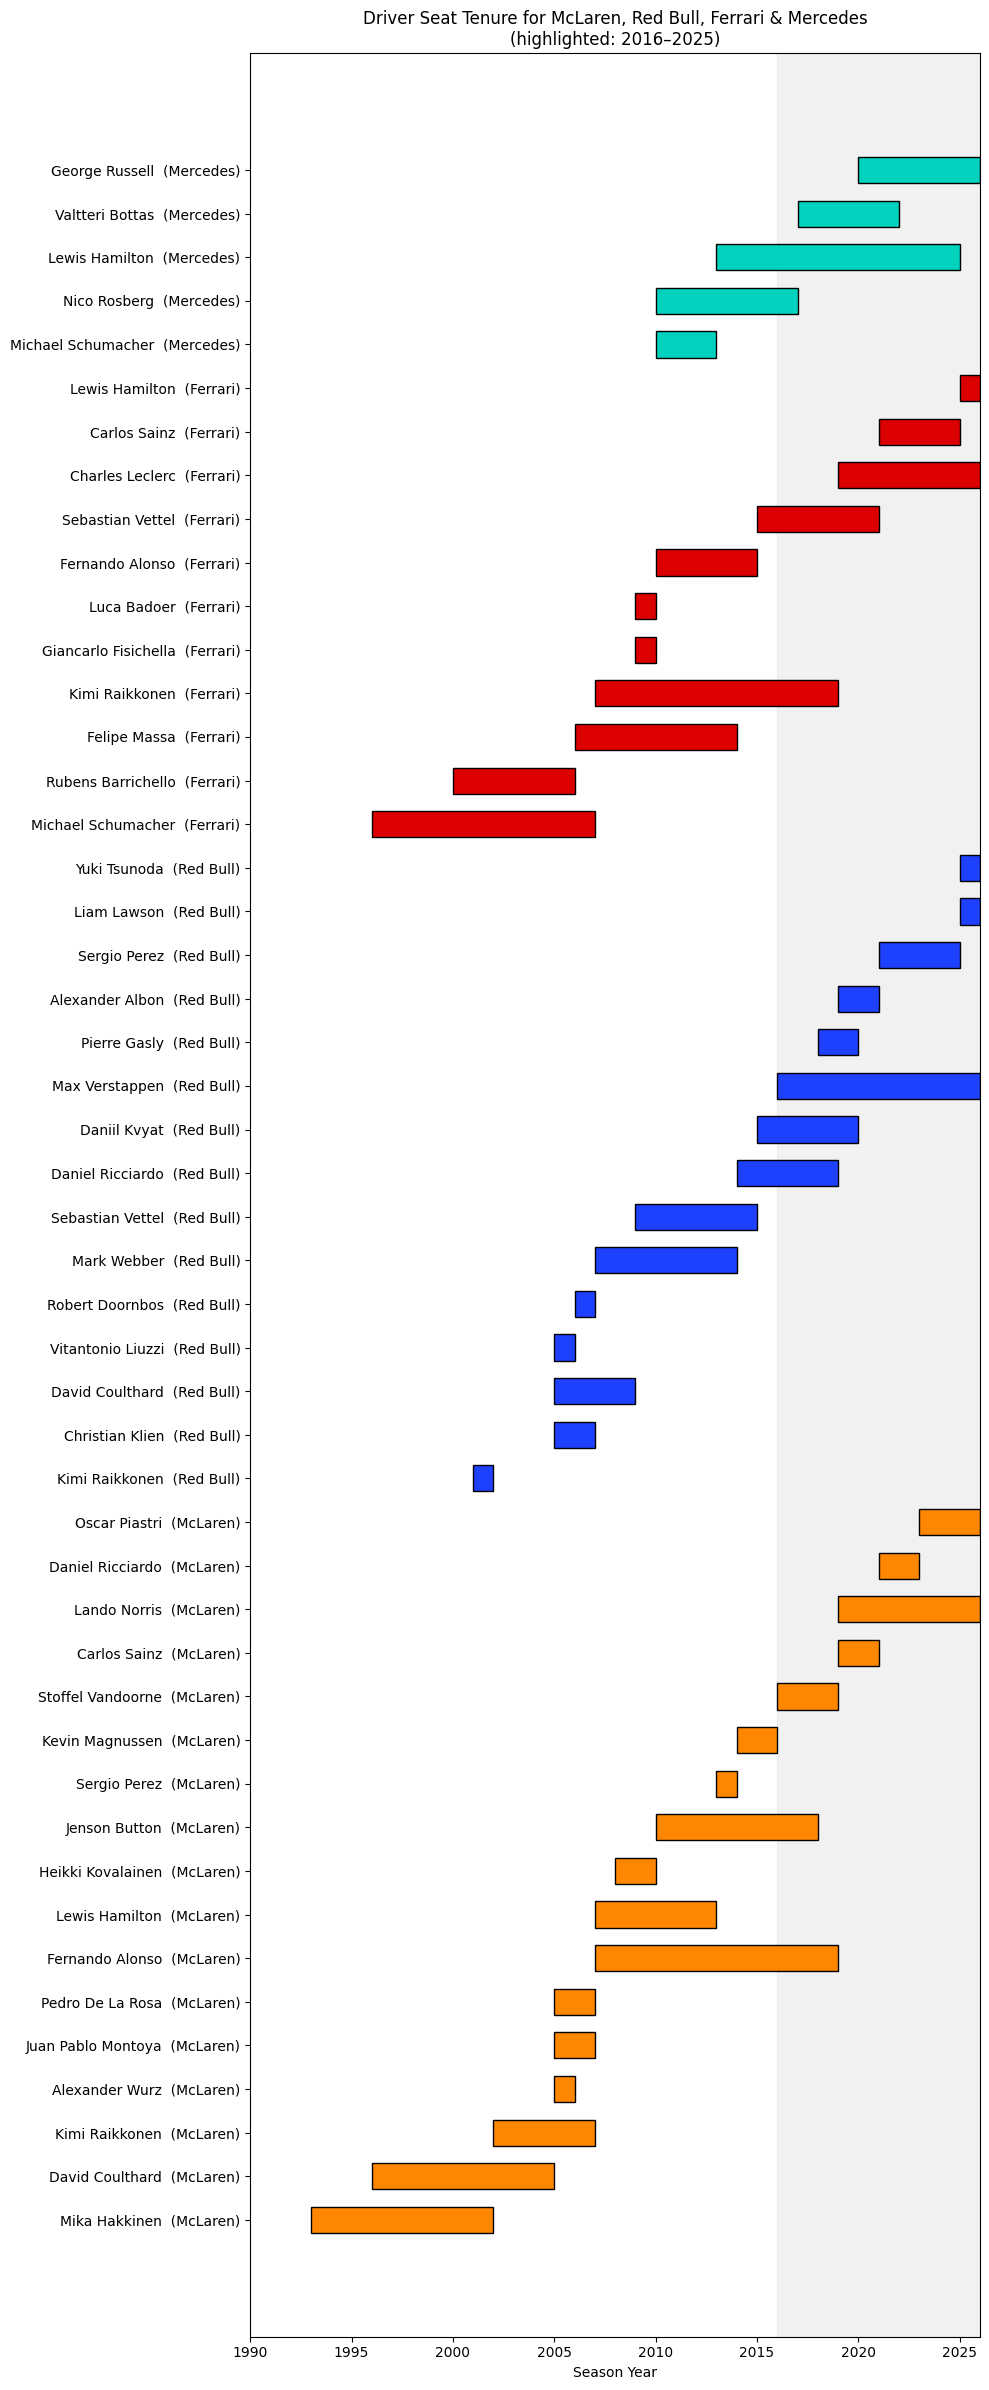

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("allDriversHistorical.csv")

core_teams = ['McLaren', 'Red Bull', 'Ferrari', 'Mercedes']
mask = df['Team'].str.contains('|'.join(core_teams), case=False, na=False)
df_filt = df[mask].copy()
def core_from_name(full_name):
    for core in core_teams:
        if core.lower() in full_name.lower():
            return core
    return 'Other'

df_filt['CoreTeam'] = df_filt['Team'].apply(core_from_name)
spans = (
    df_filt
    .groupby(['Driver','CoreTeam'])['Year']
    .agg(start='min', end='max')
    .reset_index()
)
team_order = {team: i for i, team in enumerate(core_teams)}
spans['TeamOrder'] = spans['CoreTeam'].map(team_order)
spans = spans.sort_values(['TeamOrder', 'start', 'Driver']).reset_index(drop=True)
colors = {
    'McLaren':   '#FF8700',
    'Red Bull':  '#1E41FF',
    'Ferrari':   '#DC0000',
    'Mercedes':  '#00D2BE'
}
fig, ax = plt.subplots(figsize=(10, 0.5 * len(spans)))
ax.axvspan(2016, 2026, color='lightgrey', alpha=0.3, zorder=0)

for idx, row in spans.iterrows():
    ax.barh(
        y=idx,
        width = row['end'] - row['start'] + 1,
        left  = row['start'],
        height=0.6,
        color = colors[row['CoreTeam']],
        edgecolor='black',
        zorder=1
    )
ax.set_yticks(range(len(spans)))
ax.set_yticklabels(spans['Driver'] + '  (' + spans['CoreTeam'] + ')')
min_year, max_year = df['Year'].min(), df['Year'].max()
ax.set_xlim(min_year - 1, max_year + 1)
ax.set_xlabel('Season Year')
ax.set_title('Driver Seat Tenure for McLaren, Red Bull, Ferrari & Mercedes\n(highlighted: 2016–2025)')
plt.tight_layout()
plt.show()
